In [1]:
# Import data and libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
#from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
#pd.options.display.mpl_style = 'default'
matplotlib.style.use('ggplot') # for pandas version 17
#get_ipython().magic(u'matplotlib inline')
import sys 
sys.path.append('../Bmore/2015')
import ibuttonplots
import importibuttondata

meta = pd.DataFrame(pd.read_csv('./data/metaNairobi.csv', sep = ','))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.



In [2]:
temp_or_rh = 'H'# T for temp, H for RH or whatever the file naming convention is

In [3]:
frames = []
sensornumbers = []
keep_same_date = [36,37,38,39,40,41,43,44,45,46,48,50]
date_spec = {'Date': [ 0]}

for n in keep_same_date:
    file = glob.glob('./data/%s%s.csv'%(n, temp_or_rh))[0]
    try :
        colnumber = int(os.path.splitext(os.path.basename(file))[0][0:-1])
        frame = pd.read_csv(file, sep = ',',
                skiprows = 19,
                parse_dates = date_spec,
                keep_date_col=True)
        frame = frame.set_index('Date').rename(columns = {'Value': colnumber})

        try:
                startdate = pd.to_datetime(meta['time'][colnumber]) #when the sensor was installed according to metadata
                ind = np.argmin([abs(frame.index -startdate)]) # Find the closest recording time to when put out
                frames.append(frame[ind+1:]) # only save the data from the hour after the sensor was installed
        except KeyError:
                frames.append(frame)
        #ind = np.argmin([abs(frame.index -startdate)]) # Find the closest recording time to when put out
        #frames.append(frame[ind+1:]) # only save the data from the hour after the sensor was installed
        #frames.append(frame)
        #frames.append(pd.read_csv(file, sep = ',', skiprows = 19, parse_dates = date_spec, keep_date_col=True).set_index('Date').rename(columns = {'Value': int(os.path.splitext(os.path.basename(file))[0][0:-1])}))

    except ValueError:
        print "oops... something went wrong"

N = [1, 2, 4, 5, 12, 16, 17, 19, 20, 22, 24, 26, 34, 35] #files with date indexes starting before Nov. 11, 2015   
#N = [1, 2, 4, 5, 12, 16, 17, 19, 20, 22, 24, 34, 35] #files with date indexes starting before Nov. 11, 2015 
for n in N:
    file = glob.glob('./data/%s%s.csv'%(n, temp_or_rh))[0]
    colnumber = n
    try: 
        # read in data
        frame = pd.read_csv(file, sep = ',',
                            skiprows = 19,
                            parse_dates = date_spec,
                            keep_date_col=True)
        # set the index and value column
        frame = frame.set_index('Date').rename(columns = {'Value': n})
        #adjust the index
        adjusted_index = frame.index + pd.DateOffset(days = 87, hours = 11)
        frame = frame.set_index(adjusted_index)

        try:
            startdate = pd.to_datetime(meta['time'][colnumber]) #when the sensor was installed according to metadata
            ind = np.argmin([abs(frame.index -startdate)]) # Find the closest recording time to when put out
            frames.append(frame[ind+1:]) # only save the data from the hour after the sensor was installed

        except KeyError:
            frames.append(frame)

    except IndexError: 
        print 'Sensor %s is not available'%n
        
# adjust the following dates by 8 hours
adjust_date = [3, 8, 9, 10, 11, 13, 18, 21, 23, 25, 27, 29, 30, 31, 32, 33]
for n in adjust_date:
    file = glob.glob('./data/%s%s.csv'%(n, temp_or_rh))[0]
    colnumber = n
    try: 
        # read in data
        frame = pd.read_csv(file, sep = ',',
                            skiprows = 19,
                            parse_dates = date_spec,
                            keep_date_col=True)
        # set the index and value column
        frame = frame.set_index('Date').rename(columns = {'Value': n})
        #adjust the index
        adjusted_index = frame.index + pd.DateOffset(hours = 8)
        frame = frame.set_index(adjusted_index)

        try:
            startdate = pd.to_datetime(meta['time'][colnumber]) #when the sensor was installed according to metadata
            ind = np.argmin([abs(frame.index -startdate)]) # Find the closest recording time to when put out
            frames.append(frame[ind+1:]) # only save the data from the hour after the sensor was installed

        except KeyError:
            frames.append(frame)

    except IndexError: 
        print 'Sensor %s is not available'%n

        
tempDF = pd.concat(frames, axis =1).resample('H').mean()
tempDF = tempDF[np.sort(tempDF.columns)]

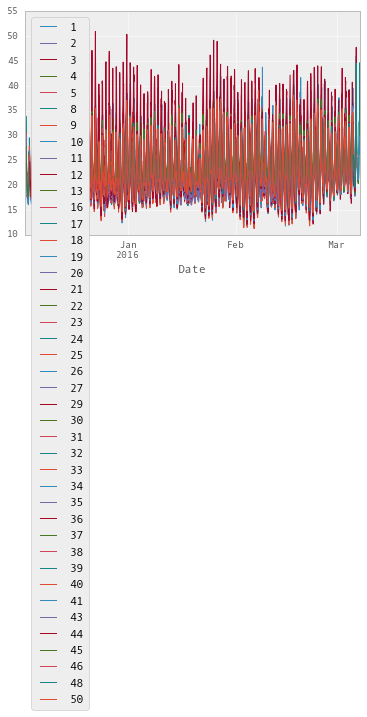

In [9]:
tempDF.plot()

In [4]:
tempDF.to_csv('data/CleanedNairobiHumidity_full.csv')

In [98]:
# keep_same_date = [36,37,38,39,40,41,43,44,45,46,48,50] # keep the same date
# # adjust the following dates by 8 hours
# adjust_date = [3, 8, 9, 10, 11, 13, 18, 21, 23, 25, 27, 29, 30, 31, 32, 33]
# # adjust the following dates by 87 days, 11 hours (no idea how/why)
# N = [1, 2, 4, 5, 12, 16, 17, 19, 20, 22, 24, 26, 34, 35, 42]

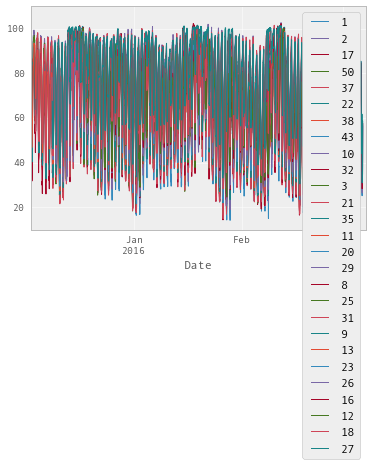

In [5]:
MukuruCleaned =[1,2,17,50, 37, 22,38,43] # throw out 36 since it's too high, 
KiberaCleaned = [10,32,3,21,35,11,20,29,8,25,31,9,13,23,26,16,12] # sensor 30 inside a house, 46 also inside
chiromoCleaned = [18, 27]#
selected = MukuruCleaned + KiberaCleaned + chiromoCleaned
tempDF[selected].plot()

In [6]:
tempDF[selected].to_csv('data/CleanedNairobiHumidity.csv')